In [72]:
import pandas as pd #MAAŞ TAHMİNİ
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

for name, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(name, filename))

%matplotlib inline
pd.options.mode.chained_assignment = None

input\FullData.csv
input\mls-salaries-2007.csv
input\mls-salaries-2008.csv
input\mls-salaries-2009.csv
input\mls-salaries-2010.csv
input\mls-salaries-2011.csv
input\mls-salaries-2012.csv
input\mls-salaries-2013.csv
input\mls-salaries-2014.csv
input\mls-salaries-2015.csv
input\mls-salaries-2016.csv
input\mls-salaries-2017.csv


In [11]:
soccer=pd.read_csv('input/FullData.csv')
soccer

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,NaN,Wexford Youths,Sub,30.0,02/01/2016,2020.0,45,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,NaN,NaN,Longford Town,Sub,28.0,01/01/2016,2020.0,45,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,NaN,NaN,Swindon Town,Res,32.0,03/03/2015,2023.0,45,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,NaN,NaN,Ross County,Sub,45.0,03/02/2016,2017.0,45,...,12,13,12,24,12,40,45,44,43,45


In [53]:
salaries=pd.read_csv('input/mls-salaries-2017.csv')
salaries['Full Name']=salaries['first_name']+' '+salaries['last_name']
salaries

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Full Name
0,ATL,Almiron,Miguel,M,1912500.0,2297000.00,Miguel Almiron
1,ATL,Ambrose,Mikey,D,65625.0,65625.00,Mikey Ambrose
2,ATL,Asad,Yamil,M,150000.0,150000.00,Yamil Asad
3,ATL,Bloom,Mark,D,99225.0,106573.89,Mark Bloom
4,ATL,Carleton,Andrew,F,65000.0,77400.00,Andrew Carleton
...,...,...,...,...,...,...,...
611,VAN,Tornaghi,Paolo,GK,80000.0,80000.00,Paolo Tornaghi
612,VAN,Waston,Kendall,D,350000.0,368125.00,Kendall Waston
613,VAN,Williams,Sheanon,D,175000.0,184000.00,Sheanon Williams
614,NaN,Babouli,Mo,F,54075.0,54075.00,Mo Babouli


In [54]:
salaries.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Full Name
0,ATL,Almiron,Miguel,M,1912500.0,2297000.00,Miguel Almiron
1,ATL,Ambrose,Mikey,D,65625.0,65625.00,Mikey Ambrose
2,ATL,Asad,Yamil,M,150000.0,150000.00,Yamil Asad
3,ATL,Bloom,Mark,D,99225.0,106573.89,Mark Bloom
4,ATL,Carleton,Andrew,F,65000.0,77400.00,Andrew Carleton


In [55]:
soccer.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [56]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club                     614 non-null    object 
 1   last_name                616 non-null    object 
 2   first_name               612 non-null    object 
 3   position                 616 non-null    object 
 4   base_salary              616 non-null    float64
 5   guaranteed_compensation  616 non-null    float64
 6   Full Name                612 non-null    object 
dtypes: float64(2), object(5)
memory usage: 33.8+ KB


In [57]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

In [58]:
soccer.isnull().sum()

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina             

In [59]:
salaries.isnull().sum()

club                       2
last_name                  0
first_name                 4
position                   0
base_salary                0
guaranteed_compensation    0
Full Name                  4
dtype: int64

In [60]:
salaries.groupby('position').mean()

,base_salary,guaranteed_compensation
position,,
D,166574.093784,179533.184811
D-M,134930.000000,154328.927857
F,489588.598349,557437.206514
F-M,335834.000000,367920.805000
F/M,125000.000000,131250.000000
GK,146472.515538,158665.155692
M,376106.218632,406781.788396
M-D,219032.250000,230282.250000
M-F,212975.604211,231104.551579


In [61]:
salaries = salaries.replace({'M':'Midfielder','GK':'Goalkeeper','F':'Forward',
                         'D':'Defensive','D-M':'Midfielder','M-F':'Forward',
                         'F-M':'Midfielder','M-D':'Defensive','M/F':'Forward',
                         'F/M':'Midfielder'                        
                        })

In [62]:
salaries.groupby('position').mean()

,base_salary,guaranteed_compensation
position,,
Defensive,167684.319312,180607.239101
Forward,449315.455039,509431.333256
Goalkeeper,146472.515538,158665.155692
Midfielder,359500.181760,389429.695107


In [64]:
mls=soccer[soccer['Name'].isin(salaries['Full Name'].tolist())]
mls

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
159,Sebastian Giovinco,Italy,NaN,NaN,Toronto FC,LS,10.0,02/03/2015,2019.0,83,...,80,86,86,75,70,3,6,6,3,3
280,David Villa,Spain,NaN,NaN,NYCFC,ST,7.0,07/01/2014,2017.0,82,...,76,83,80,88,78,11,8,9,9,9
286,Andrea Pirlo,Italy,NaN,NaN,NYCFC,CM,21.0,07/06/2015,2023.0,82,...,65,92,93,84,76,5,5,1,4,2
520,Bastian Schweinsteiger,Germany,NaN,NaN,Chicago Fire,LCM,31.0,03/21/2017,2023.0,82,...,80,82,78,77,82,13,14,13,14,11
617,Osvaldo Alonso,Cuba,NaN,NaN,Sounders FC,RDM,6.0,01/01/2009,2021.0,79,...,64,66,51,66,66,16,9,15,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17418,Raheem Edwards,Canada,NaN,NaN,Toronto FC,Sub,44.0,03/02/2017,2020.0,62,...,48,39,39,49,39,10,7,10,14,9
17475,Adonijah Reid,Canada,NaN,NaN,FC Dallas,Res,28.0,01/13/2017,2020.0,49,...,45,35,33,62,36,10,15,12,13,13
17476,Jacori Hayes,United States,NaN,NaN,FC Dallas,Sub,15.0,01/13/2017,2020.0,49,...,37,45,44,43,36,14,10,6,6,13
17510,George Malki,United States,NaN,NaN,Houston Dynamo,Res,21.0,03/01/2017,2023.0,49,...,31,40,39,37,31,11,11,8,14,15


In [65]:
mls['base_salary']=[salaries[salaries['Full Name'].isin([player])].reset_index()['base_salary'][0]
                   for player in mls['Name']]
mls['guaranteed_compensation']=[salaries[salaries['Full Name'].isin([player])].reset_index()['guaranteed_compensation'][0]
                   for player in mls['Name']]
mls

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,base_salary,guaranteed_compensation
159,Sebastian Giovinco,Italy,NaN,NaN,Toronto FC,LS,10.0,02/03/2015,2019.0,83,...,86,75,70,3,6,6,3,3,5600000.00,7115555.67
280,David Villa,Spain,NaN,NaN,NYCFC,ST,7.0,07/01/2014,2017.0,82,...,80,88,78,11,8,9,9,9,5610000.00,5610000.00
286,Andrea Pirlo,Italy,NaN,NaN,NYCFC,CM,21.0,07/06/2015,2023.0,82,...,93,84,76,5,5,1,4,2,5600000.00,5915690.00
520,Bastian Schweinsteiger,Germany,NaN,NaN,Chicago Fire,LCM,31.0,03/21/2017,2023.0,82,...,78,77,82,13,14,13,14,11,5400000.00,5400000.00
617,Osvaldo Alonso,Cuba,NaN,NaN,Sounders FC,RDM,6.0,01/01/2009,2021.0,79,...,51,66,66,16,9,15,12,8,1100000.00,1141667.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17418,Raheem Edwards,Canada,NaN,NaN,Toronto FC,Sub,44.0,03/02/2017,2020.0,62,...,39,49,39,10,7,10,14,9,53004.00,53004.00
17475,Adonijah Reid,Canada,NaN,NaN,FC Dallas,Res,28.0,01/13/2017,2020.0,49,...,33,62,36,10,15,12,13,13,70000.08,87500.08
17476,Jacori Hayes,United States,NaN,NaN,FC Dallas,Sub,15.0,01/13/2017,2020.0,49,...,44,43,36,14,10,6,6,13,65000.04,72500.04
17510,George Malki,United States,NaN,NaN,Houston Dynamo,Res,21.0,03/01/2017,2023.0,49,...,39,37,31,11,11,8,14,15,65004.00,65004.00


<AxesSubplot:>

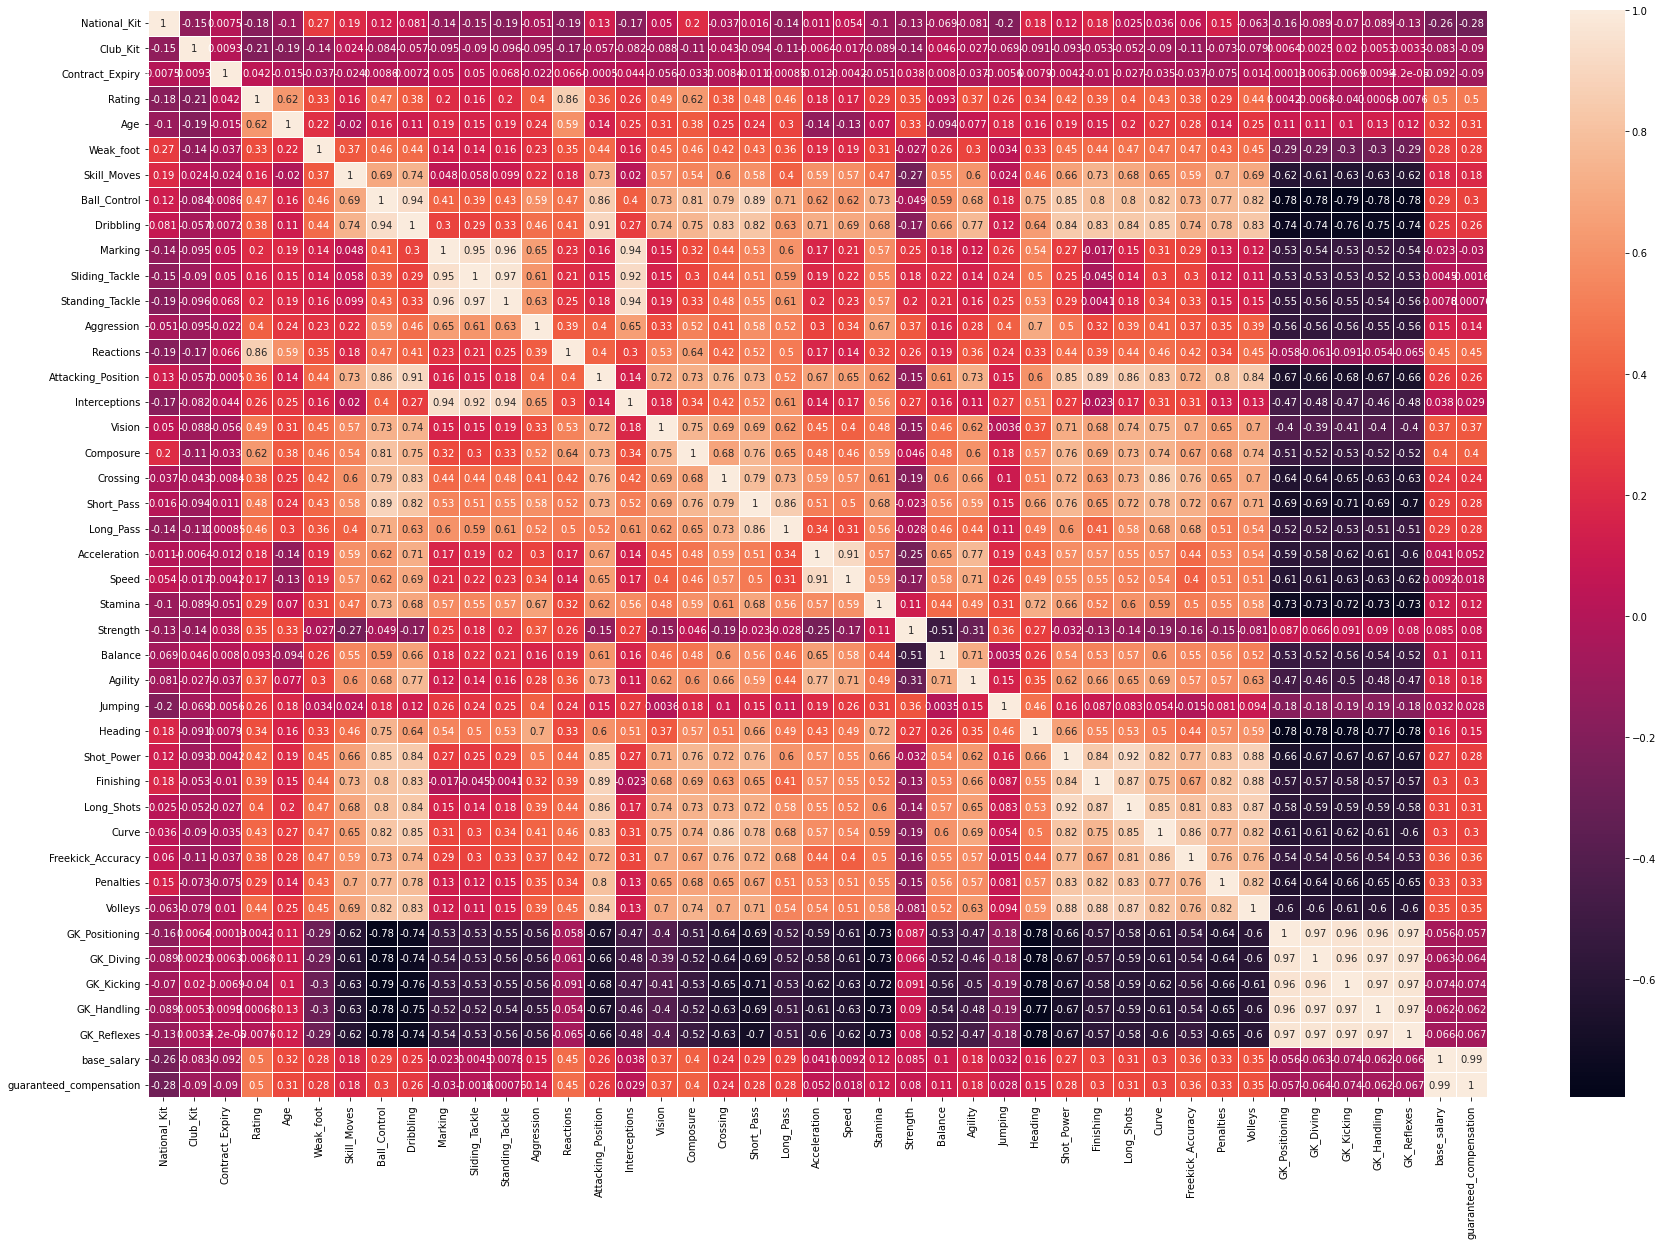

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(mls.corr(),annot=True,linewidth=1)

In [67]:
features=['Rating', 'Reactions','Vision','Composure','Freekick_Accuracy']
y=mls['guaranteed_compensation']
X=mls[features]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

df=pd.DataFrame(val_X)
df['prediction']=predictions
df['Name']=[mls['Name'][index] for index in df.reset_index()['index']]
df['guaranteed_compensation']=[mls['guaranteed_compensation'][index] for index in df.reset_index()['index']]
df['excess']=df['prediction']-df['guaranteed_compensation']

In [68]:
df['absolute error']=abs(df['excess'])

In [69]:
df

,Rating,Reactions,Vision,Composure,Freekick_Accuracy,prediction,Name,guaranteed_compensation,excess,absolute error
8153,67,59,54,67,37,375000.0,Eriq Zavaleta,133450.0,241550.0,241550.0
11100,64,55,59,59,28,54075.0,Jordan Hamilton,81957.5,-27882.5,27882.5
8057,67,68,61,63,63,372660.0,Nick DeLeon,255000.0,117660.0,117660.0
2456,74,70,66,68,56,150000.0,Yura Movsisyan,1973750.0,-1823750.0,1823750.0
10021,65,61,60,58,37,70900.0,Daniel Lovitz,78750.0,-7850.0,7850.0
...,...,...,...,...,...,...,...,...,...,...
12718,62,48,27,40,25,84996.0,Tony Alfaro,54075.0,30921.0,30921.0
1510,76,77,82,77,73,565000.0,Sacha Kljestan,787500.0,-222500.0,222500.0
16534,54,56,39,47,43,53250.0,Dan Metzger,53004.0,246.0,246.0
8818,66,68,50,69,39,257058.0,Fatai Alashe,114425.0,142633.0,142633.0


In [70]:
df.mean()['absolute error']
df.mean()['guaranteed_compensation']

df['percent error']=100*(df['absolute error']/df['guaranteed_compensation'])


In [71]:
df.sort_values(by='percent error')

,Rating,Reactions,Vision,Composure,Freekick_Accuracy,prediction,Name,guaranteed_compensation,excess,absolute error,percent error
17024,52,48,33,43,21,53004.00,Jack Elliott,53004.0,0.00,0.00,0.000000
17255,51,53,36,36,37,53004.00,Reagan Dunk,53004.0,0.00,0.00,0.000000
17351,51,50,33,38,30,53004.00,Taylor Hunter,53004.0,0.00,0.00,0.000000
13438,61,54,38,49,29,53004.00,Kyle Fisher,53004.0,0.00,0.00,0.000000
14920,59,46,48,42,33,93750.00,Zeiko Lewis,93750.0,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
9050,66,70,63,63,44,372660.00,Dillon Serna,85600.0,287060.00,287060.00,335.350467
4832,70,65,62,62,42,570000.00,Jimmy Medranda,130008.0,439992.00,439992.00,338.434558
9253,66,53,42,42,35,300662.67,Ethan White,65000.0,235662.67,235662.67,362.557954
4861,70,64,57,60,29,615000.00,Alvas Powell,123700.0,491300.00,491300.00,397.170574
